# Setting up the environment

1. Setup virtual environment 

    One of the followings:

    a. 
    ```cms
    python -m venv gdsenv
    source gdsenv/bin/activate
    ```
    
    b. 
    ```cmd
    brew install pyenv
    pyenv install 3.10.0
    pyenv virtualenv 3.10.0 gdsenv
    pyenv activate gdsenv

    ```

2. Install needed packages

In [ ]:
!pip install -U pip
!pip install jupyterlab
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

3. launch the notebook:
```cmd 
jupyter lab
```

# 1. NumPy

## 1.1 Array creation

In [2]:
import numpy as np

In [5]:
np.array([1, 4, 2, 5, 3])

array([1, 4, 2, 5, 3])

In [6]:
np.array([1, 2, 3, 4], dtype='float32')

array([1., 2., 3., 4.], dtype=float32)

In [9]:
# nested lists result in multi-dimensional arrays
np.array([range(i, i + 3) for i in [2, 4, 6]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

In [13]:
# Create a length-10 integer array filled with zeros
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
# Create a 3x5 floating-point array filled with ones
np.ones((3, 5), dtype=float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [11]:
# Create an array filled with a linear sequence
# Starting at 0, ending at 20, stepping by 2
# (this is similar to the built-in range() function)
np.arange(start=0, stop=20, step=2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [15]:
# Create an array of five values evenly spaced between 0 and 1
np.linspace(start=0, stop=1, num=5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [17]:
# Create a 3x3 array of uniformly distributed
# random values between 0 and 1
np.random.random(size=(3, 3))

array([[0.00309229, 0.86345966, 0.37332528],
       [0.59753067, 0.40288579, 0.75171468],
       [0.08361176, 0.36976865, 0.36582709]])

In [18]:
# Create a 3x3 array of random integers in the interval [0, 10)
np.random.randint(low=0, high=10, size=(3, 3))

array([[4, 5, 1],
       [0, 8, 4],
       [8, 4, 0]])

In [19]:
# Create a 3x3 identity matrix
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## 1.2 Arrays: basics

In [27]:
A = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

print("A ndim: ", A.ndim)
print("A shape:", A.shape)
print("A size: ", A.size)
print("dtype:", A.dtype)
print()
print("itemsize:", A.itemsize, "bytes")
print("nbytes:", A.nbytes, "bytes", "=", f"itemsize x size({A.itemsize * A.size})")

A ndim:  3
A shape: (3, 4, 5)
A size:  60
dtype: int64

itemsize: 8 bytes
nbytes: 480 bytes = itemsize x size(480)


### Indexing

In [43]:
X = np.random.randint(10, size=10)
Y = np.random.randint(10, size=(5, 10))

In [78]:
print("X =",  X)
print("Y = ", Y)
print()
print(f"X[6] = {X[6]}")
print(f"Y[2, 3] = {Y[2, 3]}")
print(f"Y[2, 3] = {Y[2, -1]}")

X = [1 4 9 4 7 8 2 7 4 4]
Y =  [[4 5 8 2 7 4 2 5 0 7]
 [0 3 3 2 1 7 1 6 8 8]
 [3 6 9 5 4 2 6 0 3 5]
 [7 7 6 1 1 3 8 6 2 5]
 [6 0 9 3 3 3 1 2 5 1]]

X[6] = 2
Y[2, 3] = 5
Y[2, 3] = 5


### Slicing

In [55]:
# X[start:stop:step]
print("X[3: 8] = ", X[3: 8])
print("X[3: -1: 2] = ", X[3: -1: 2])
print("Y[:: 1] = ", Y[:, 1])
print("Y[:: 1] = ", Y[2:4:, 1: 4])

X[3: 8] =  [4 7 8 2 7]
X[3: -1: 2] =  [4 8 7]
Y[:: 1] =  [5 3 6 7 0]
Y[:: 1] =  [[6 9 5]
 [7 6 1]]


In [79]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [80]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

## 1.3 Performance issues

### Loops

In [58]:
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return 

big_array = np.random.randint(1, 100, size=1000000)

In [59]:
%timeit compute_reciprocals(big_array)

722 ms ± 2.77 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Universal functions

Pushing loops into the compiled layer.

In [60]:
%timeit (1.0 / big_array)

746 µs ± 6.12 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [62]:
x = np.arange(4)
print("x     =", x)
print("x + 5 =", x + 5)
print("x * 2 =", x * 2)
print("x // 2 =", x // 2)  # floor division

x     = [0 1 2 3]
x + 5 = [5 6 7 8]
x * 2 = [0 2 4 6]
x // 2 = [0 0 1 1]


In [65]:
theta = np.linspace(0, np.pi, 3)

print("theta      = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta      =  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


And a lot more mathematical functions

### Broadcasting

Allows binary operations to be performed on arrays of different sizes

In [72]:
a = np.arange(3)
b = a.reshape(1, -1).T # np.arange(3)[:, np.newaxis]

print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [73]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

![image info](./imgs/broadcasting.png)

The light boxes are the broadcasted values.

#### It is not always possible

In [76]:
a = np.ones((3, 2))
b = np.arange(3)

print(a)
print(b)

[[1. 1.]
 [1. 1.]
 [1. 1.]]
[0 1 2]


In [77]:
a + b

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

## Example

In [93]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = np.random.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

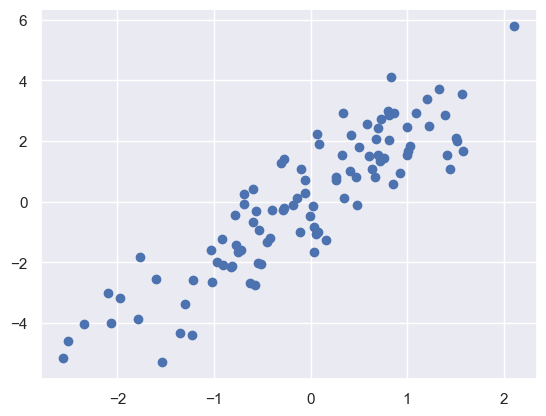

In [124]:
%matplotlib inline

rand = np.random.RandomState(0)

mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)

import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1])

In [120]:
indices = np.random.choice(X.shape[0], 20, replace=False)
selection = X[indices]  # fancy indexing here
selection.shape

(20, 2)

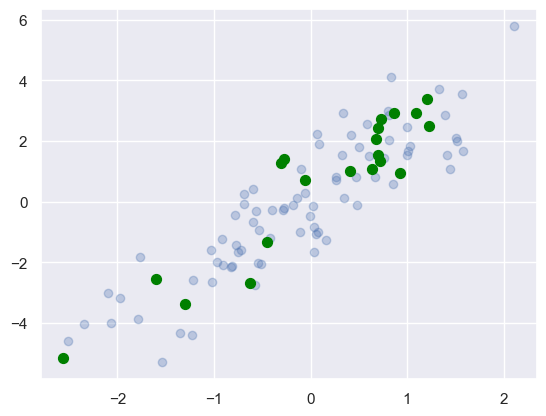

In [121]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(
    selection[:, 0], selection[:, 1], s=50, c='green'
)

# 2. Pandas

In [3]:
import pandas as pd

## 2.1 Series
One dimensional objects

In [127]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [130]:
print("data.values:", data.values)
print("data.index:", data.index)
print("data[1]:", data[1])
print("data[1:3]:\n", data[1:3])

data.values: [0.25 0.5  0.75 1.  ]
data.index: RangeIndex(start=0, stop=4, step=1)
data[1]: 0.5
data[1:3]:
 1    0.50
2    0.75
dtype: float64


#### Index objet

In [136]:
data = pd.Series(
    [0.25, 0.5, 0.75, 1.0],index=['a', 'b', 'c', 'd']
)
print(data)

# index can be anything
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 7, 3])
print(data)

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64
2    0.25
5    0.50
7    0.75
3    1.00
dtype: float64


**Note that indeices are not sorted**

#### Construction via dicationary 

In [12]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [13]:
population['California':'New York']

California    38332521
Texas         26448193
New York      19651127
dtype: int64

## 2.2  DataFrames

### From series

In [14]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)

states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [140]:
print("states.index:", states.index)
print("states.columns:", states.columns)
print("states['area']: \n", states['area'])

states.index: Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')
states.columns: Index(['population', 'area'], dtype='object')
states['area']: 
 California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64


### From 2-dim numpy

In [143]:
pd.DataFrame(data=np.random.rand(3, 2), columns=['foo', 'bar'], index=['a', 'b', 'c'])

,foo,bar
a,0.543500,0.394145
b,0.906988,0.088537
c,0.545589,0.052015


### From dictionaries 

In [142]:
pd.DataFrame({"col1": [1, 2, 3], "col2": [11, 22, 33]}) 

,col1,col2
0,1,11
1,2,22
2,3,33


### Indexers: loc, iloc

In [144]:
states.loc["California": "New York", ["population"]]

,population
California,38332521
Texas,26448193
New York,19651127


In [152]:
states.iloc[0: 2, 0]

California    38332521
Texas         26448193
Name: population, dtype: int64

In [149]:
states.iloc[0: 2, [0]]

,population
California,38332521
Texas,26448193


### Value assignment 

In [155]:
states['density'] = states['population'] / states['area']
states

,population,area,density
California,38332521,423967,90.413926
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763


In [159]:
states.drop(columns=["density"], inplace=True)

In [161]:
states_with_density = states.assign(
    density=lambda df: df['population'] / df['area']
)
states_with_density

,population,area,density
California,38332521,423967,90.413926
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763


### Apply function

In [16]:
states.assign(
    area_km=lambda df: df['area'].apply(lambda x: x/1000)
)

,population,area,area_km
California,38332521,423967,423.967
Texas,26448193,695662,695.662
New York,19651127,141297,141.297
Florida,19552860,170312,170.312
Illinois,12882135,149995,149.995


### Index allignment

In [163]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [164]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

### Combining datasets

In [188]:
from IPython.display import display_html
from itertools import chain,cycle

def display_dfs(dfs: list, captions: list, tablespacing=5):
    output = ""
    for (caption, df) in zip(captions, dfs):
        output += (
            df
            .style.set_table_attributes("style='display:inline'")
            .set_caption(caption)._repr_html_()
        )
        output += tablespacing * "\xa0"
    display(HTML(output))

def desplay_df_expr(*args):
    display_dfs([eval(expr) for expr in args], [expr for expr in args])
    
def make_df(cols, indices):
    data = {
        col: [f"{col}{i}" for i in indices]
        for col in cols
    }
    return pd.DataFrame(data, indices)


#### Concatination

In [191]:
df1 = make_df('AB', [0, 1, 2])
df2 = make_df('AB', [3, 4])
desplay_df_expr('df1', 'df2', 'pd.concat([df1, df2])')
desplay_df_expr('df1', 'df2', 'pd.concat([df1, df2], axis=1)')

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
0,A0,B0
1,A1,B1
2,A2,B2


#### Joins

![image info](./imgs/joins.png)

In [204]:
df1 = make_df("AB", [0, 1, 2])
df2 = make_df("AC", [1, 2, 3, 4])

In [205]:
desplay_df_expr('df1', 'df2', 'pd.merge(df1, df2, on="A", how="outer")')

In [206]:
desplay_df_expr('df1', 'df2', 'pd.merge(df1, df2, on="A", how="right")')

In [207]:
desplay_df_expr('df1', 'df2', 'pd.merge(df1, df2, on="A", how="inner")')

### Aggregation and grouping

#### 1. Simple aggregation

In [7]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [6]:
ser.mean()

0.5623850983416314

In [8]:
df = pd.DataFrame({
    'A': rng.rand(5),
    'B': rng.rand(5)
})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [9]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

#### 2. Grouping

![image info](./imgs/grouping.png)

In [19]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [20]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [21]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [23]:
df.groupby('key').agg({
    'data1': 'min',
    'data2': 'max'
})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [25]:
df.groupby('key').agg(
    data1_min=('data1', 'min'),
    data2_max=('data2', 'max')
)

,data1_min,data2_max
key,,
A,0,5
B,1,7
C,2,9


In [26]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


# 3. Exercise

Load the cinema dataset ("../data/cinema.csv")
Answer the fowllowing questions (N.B. you need some clean ups): 
    
1. Which year/decade had the most production?
2. What is the average sale over each decade? (considering only the available data)
3. Plot the distribution of movie durations
4. Who were the busiest star in each decade?